## Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 2. Load data

In [5]:
df = pd.read_csv("/Users/cmdb/Downloads/aau1043_dnm.csv")
df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df2 = pd.read_csv("/Users/cmdb/Downloads/aau1043_parental_age.csv")
df2

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


## 3. Count number of de novo mutations per proband

In [7]:
total = df['Proband_id'].value_counts()
total = pd.DataFrame(df['Proband_id'].value_counts())
total

,Proband_id
91410,122
114094,121
111288,115
8147,114
88246,113
...,...
121087,37
62630,34
76504,34
37789,34


In [8]:
roi = df['Phase_combined'] == 'mother'
df_maternal = df.loc[roi]
df_maternal = pd.DataFrame(df_maternal['Proband_id'].value_counts())
df_maternal

,Proband_id
112917,32
13191,31
101332,30
142988,29
14991,28
...,...
93086,4
130614,3
37789,3
113829,3


In [9]:
roi2 = df['Phase_combined'] == 'father'
df_paternal = df.loc[roi2]
paternal = df_paternal['Proband_id'].value_counts()
df_paternal = pd.DataFrame(df_paternal['Proband_id'].value_counts())
df_paternal

,Proband_id
91410,111
114094,98
111288,93
99984,91
64166,88
...,...
76504,27
1097,26
13990,25
36430,25


In [10]:
df_paternal['mat_dnm'] = df_maternal
df_paternal

,Proband_id,mat_dnm
91410,111,10
114094,98,22
111288,93,21
99984,91,12
64166,88,16
...,...,...
76504,27,5
1097,26,12
13990,25,7
36430,25,16


In [11]:
df_paternal.columns = ['pat_dnm','mat_dnm']

In [12]:
df_paternal

,pat_dnm,mat_dnm
91410,111,10
114094,98,22
111288,93,21
99984,91,12
64166,88,16
...,...,...
76504,27,5
1097,26,12
13990,25,7
36430,25,16


In [13]:
df_summary = df_paternal

In [14]:
df_summary

,pat_dnm,mat_dnm
91410,111,10
114094,98,22
111288,93,21
99984,91,12
64166,88,16
...,...,...
76504,27,5
1097,26,12
13990,25,7
36430,25,16


In [15]:
df_summary['total_dnm'] = total

In [16]:
df_summary

,pat_dnm,mat_dnm,total_dnm
91410,111,10,122
114094,98,22,121
111288,93,21,115
99984,91,12,103
64166,88,16,105
...,...,...,...
76504,27,5,34
1097,26,12,39
13990,25,7,33
36430,25,16,42


In [17]:
df_summary.index.name = 'Proband_id'

In [18]:
df_summary.reset_index(inplace=True)

## Proband counts in new dataframe

In [19]:
df_summary

,Proband_id,pat_dnm,mat_dnm,total_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


## 4. Combine dataframe with paternal and maternal ages

In [25]:
df_merged = pd.merge(df_summary, df2, on='Proband_id')
df_merged

,Proband_id,pat_dnm,mat_dnm,total_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


## 5a. Plot of maternal de novo mutations vs. maternal age

In [33]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = df_merged)
results = model.fit()
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb213ff71d0>>

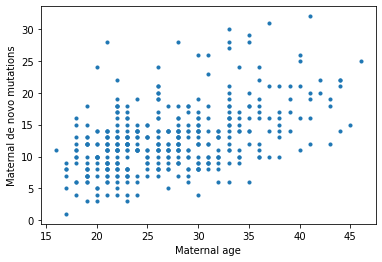

In [74]:
fig, ax = plt.subplots()
area = np.pi*3
plt.scatter(y=df_merged['mat_dnm'], x=df_merged['Mother_age'],s=area)
plt.xlabel("Maternal age")
plt.ylabel("Maternal de novo mutations")
plt.show()

## 5b. Plot of paternal de novo mutations vs. paternal age

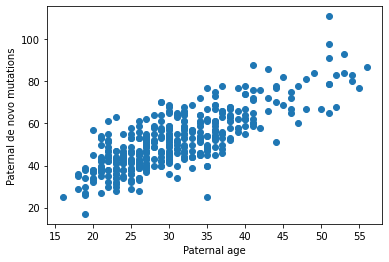

In [73]:
fig, ax = plt.subplots()
plt.scatter(y=df_merged['pat_dnm'], x=df_merged['Father_age'])
plt.xlabel("Paternal age")
plt.ylabel("Paternal de novo mutations")
plt.show()

## 6. Ordinary least squares for maternal age and mat_dnm

In [42]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = df_merged)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:31:05   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Relationship is signifiant, p < 0.05
- Size of relationship: when mother's age increases, de novo mutations increases by 0.3776

## 7. Ordinary least squares for paternal age and pat_dnm

In [43]:
model = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = df_merged)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:31:24   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Relationship is significant, p < 0.05
- When father's age increases by one year, de novo mutations increase by 1.3538

## 8. Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

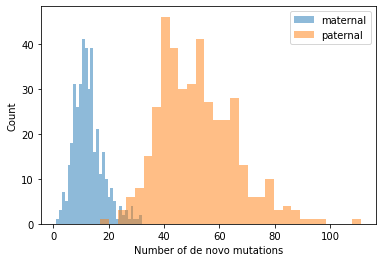

In [84]:
fig,ax = plt.subplots()
ax.hist(df_merged["mat_dnm"],bins = 30, alpha = 0.5, label = 'maternal')
ax.hist(df_merged["pat_dnm"],bins = 30, alpha = 0.5, label = 'paternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Count')
plt.legend()
plt.show()

## 9. T-test if de novo mutations are different

In [45]:
# conduct a t-test, using scipy
from scipy import stats
stats.ttest_ind(df_summary["mat_dnm"],
df_summary["pat_dnm"])

# independent t-test using scipy ttest_ind() function
#p value is not less than 0.05, do not reject null hypothesis 

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

- Yes, the number of de novo mutations is statistically different between maternally and paternally inherited

## 10. Refit models using Poisson regression

In [46]:
model = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = df_merged)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:42:44   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [57]:
paternal_p_model = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = df_merged)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:59:55   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

## 11. Predict number of paternal de novo mutations for a proband father who was 50.5 years old

In [49]:
import math

In [50]:
math.exp(3.1903+(50.5*0.0241))

82.05173803957092

- The Poisson regression coefficient is interpreted: for a one unit change in the predictor variable, the difference in the logs of expected counts is expected to change by the respective regression coefficient, given the other predictor variables in the model are held constant
- So, the number of paternal de novo mutations for a proband father who was 50.5 years old would be ~82.

In [61]:
new_obs = pd.DataFrame({"Father_age": [50.5]})
new_obs

,Father_age
0,50.5


In [62]:
results.predict(new_obs)

0    82.031316
dtype: float64